In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Load Data

In [3]:
file_path = 'data/participants/demographics.csv'
df = pd.read_csv(file_path)

df

,gender,age,country,education_level,ai_proficiency,financial_literacy,consent_given,instructed_passed,data_quality,data_quality_comment
0,Male,21,Switzerland,"Tertiary (college, university)",2,6,True,True,True,NaN
1,Female,24,Switzerland,"Tertiary (college, university)",3,2,True,True,True,NaN
2,Male,20,Switzerland,"Tertiary (college, university)",5,5,True,True,True,NaN
3,Male,21,Switzerland,"Tertiary (college, university)",7,7,True,True,True,NaN
4,Male,20,Switzerland,"Tertiary (college, university)",4,1,True,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...
77,Male,22,Switzerland,"Tertiary (college, university)",2,4,True,True,True,NaN
78,Male,22,Switzerland,"Tertiary (college, university)",3,4,True,True,True,NaN
79,Male,23,Austria,"Tertiary (college, university)",5,5,True,True,True,NaN
80,Male,24,Switzerland,"Tertiary (college, university)",5,1,True,True,False,I didn't really understand what the AI did and...


## Data cleaning

In [5]:
excluded = df[(df['consent_given'] == False) | (df['data_quality'] == False)]

excluded

,gender,age,country,education_level,ai_proficiency,financial_literacy,consent_given,instructed_passed,data_quality,data_quality_comment
28,Male,24,Switzerland,"Tertiary (college, university)",4,3,True,True,False,Given the fact that my financial knowledge is ...
61,Male,25,Switzerland,"Tertiary (college, university)",5,4,True,False,False,I think it is hard to make an uneducated predi...
80,Male,24,Switzerland,"Tertiary (college, university)",5,1,True,True,False,I didn't really understand what the AI did and...


In [9]:
df_cleaned = df[~((df['consent_given'] == False) | (df['data_quality'] == False))]

df_cleaned

,gender,age,country,education_level,ai_proficiency,financial_literacy,consent_given,instructed_passed,data_quality,data_quality_comment
0,Male,21,Switzerland,"Tertiary (college, university)",2,6,True,True,True,NaN
1,Female,24,Switzerland,"Tertiary (college, university)",3,2,True,True,True,NaN
2,Male,20,Switzerland,"Tertiary (college, university)",5,5,True,True,True,NaN
3,Male,21,Switzerland,"Tertiary (college, university)",7,7,True,True,True,NaN
4,Male,20,Switzerland,"Tertiary (college, university)",4,1,True,True,True,NaN
...,...,...,...,...,...,...,...,...,...,...
76,Male,26,Switzerland,"Tertiary (college, university)",5,5,True,True,True,NaN
77,Male,22,Switzerland,"Tertiary (college, university)",2,4,True,True,True,NaN
78,Male,22,Switzerland,"Tertiary (college, university)",3,4,True,True,True,NaN
79,Male,23,Austria,"Tertiary (college, university)",5,5,True,True,True,NaN


## Age

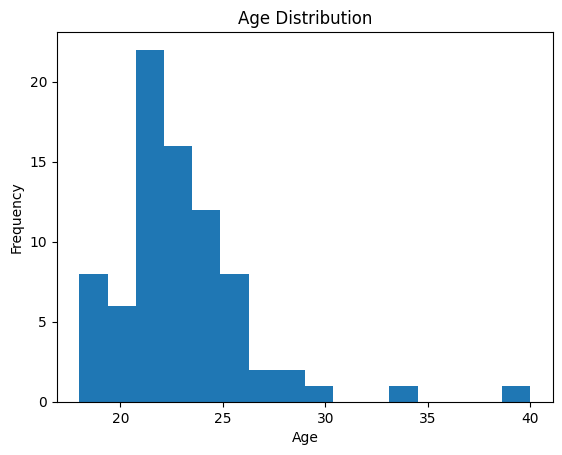

Average age: 22.95
Standard deviation of age: 3.36
Minimum age: 18
Maximum age: 40


In [ ]:

ages = df_cleaned['age']

plt.figure()
plt.hist(ages, bins='auto')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

mean_age = ages.mean()
std_age = ages.std()
min_age = ages.min()
max_age = ages.max()

print(f"Average age: {mean_age:.2f}")
print(f"Standard deviation of age: {std_age:.2f}")
print(f"Minimum age: {min_age}")
print(f"Maximum age: {max_age}")

## Education

In [12]:
edu_counts = df_cleaned['education_level'].value_counts().reset_index()
edu_counts.columns = ['education_level', 'count']

edu_counts

,education_level,count
0,"Tertiary (college, university)",67
1,High School,9
2,Other,3


In [21]:
country_counts = df_cleaned['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

country_counts

,country,count
0,Switzerland,54
1,Sweden,9
2,Singapore,5
3,Germany,4
4,Netherlands,2
5,Finland,1
6,Chile,1
7,United States,1
8,Malaysia,1
9,Austria,1


## Gender

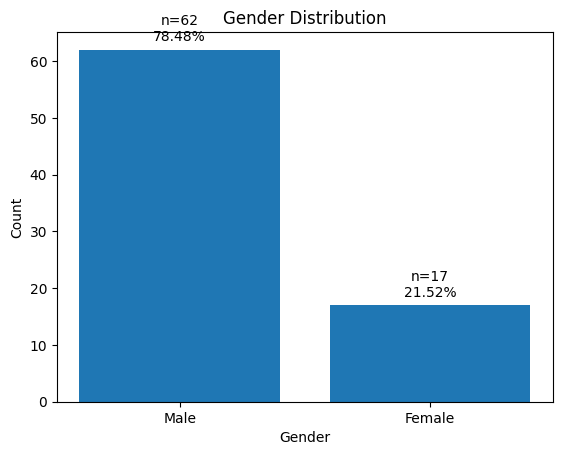

In [ ]:
gender_counts = df_cleaned['gender'].value_counts().reset_index()
gender_counts.columns = ['gender', 'count']
gender_counts['percentage'] = (gender_counts['count'] / gender_counts['count'].sum() * 100).round(2)


plt.figure()
bars = plt.bar(gender_counts['gender'], gender_counts['count'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

for bar, pct in zip(bars, gender_counts['percentage']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 1,
             f'n={int(height)}\n{pct}%', 
             ha='center', va='bottom')

plt.show()

## AI Proficiency / Financial Literacy

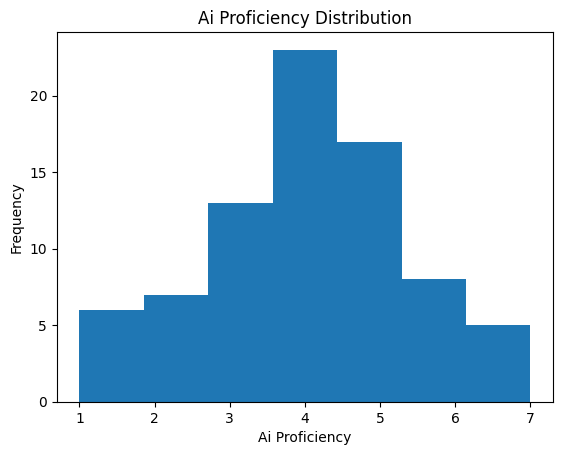

Ai Proficiency:
  Average: 4.04
  Standard Deviation: 1.56
  Minimum: 1
  Maximum: 7

  Mode: 4



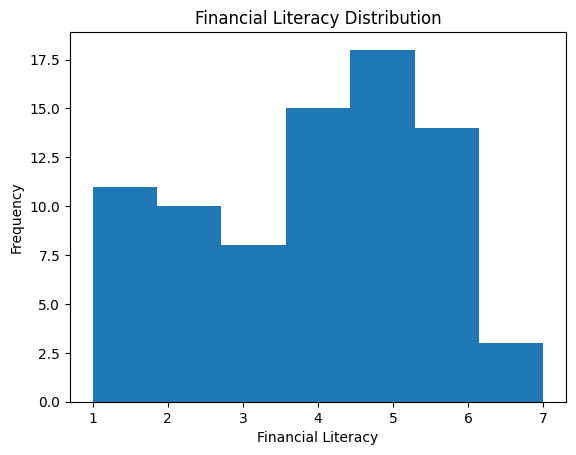

Financial Literacy:
  Average: 3.92
  Standard Deviation: 1.78
  Minimum: 1
  Maximum: 7

  Mode: 5



In [ ]:
variables = ['ai_proficiency', 'financial_literacy']

for var in variables:
    data = df_cleaned[var]

    plt.figure()
    plt.hist(data, bins=7)
    plt.title(f'{var.replace("_", " ").title()} Distribution')
    plt.xlabel(var.replace("_", " ").title())
    plt.ylabel('Frequency')
    plt.show()
    
    mean = data.mean()
    std = data.std()
    min_val = data.min()
    max_val = data.max()
    modes = data.mode().tolist()

    mode_str = ', '.join(str(m) for m in modes)
    

    print(f"{var.replace('_', ' ').title()}:")
    print(f"  Average: {mean:.2f}")
    print(f"  Standard Deviation: {std:.2f}")
    print(f"  Minimum: {min_val}")
    print(f"  Maximum: {max_val}\n")
    print(f"  Mode: {mode_str}\n")